In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import openpyxl as px

In [2]:
e1 = pd.read_excel(r'/Users/alejandrabenavidessanclemente/Desktop/EIIC302.xlsx')

In [3]:
desc_e1 = e1.describe()
print(desc_e1)

       ORIG_STD_VOLUME     STD_VOLUME  ORIG_TEMPERATURE   TEMPERATURE  \
count     44002.000000   44002.000000      44002.000000  44002.000000   
mean        499.289370     499.363206         24.478913     24.478913   
std        5221.859472    5221.867913          5.760266      5.760266   
min     -999029.562500 -999029.562500          5.499085      5.499085   
25%           0.000000       0.000000         19.695633     19.695633   
50%           0.000000       0.000000         25.381188     25.381188   
75%        1279.560547    1279.617187         29.086762     29.086762   
max      423551.624997  423551.624997         63.844402     63.844402   

           PRESSURE  ORIG_PRESSURE  ORIG_RAW_VOLUME    RAW_VOLUME  
count  44002.000000   44002.000000     4.400200e+04  4.400200e+04  
mean      17.475329      17.475329     2.272626e+07  2.272626e+07  
std        0.620667       0.620667     4.767204e+09  4.767204e+09  
min        0.062225       0.062225     0.000000e+00  0.000000e+00  
25

## Nulos

In [4]:
nulos = e1.isnull().sum()
print(nulos)

ORIG_STD_VOLUME     0
STD_VOLUME          0
ORIG_TEMPERATURE    0
TEMPERATURE         0
PRESSURE            0
ORIG_PRESSURE       0
ORIG_RAW_VOLUME     0
RAW_VOLUME          0
EFFECTIVE_DATE      0
dtype: int64


## Duplicados

In [5]:
duplicados = e1.duplicated().sum()
print(f"Número de filas duplicadas: {duplicados}")

Número de filas duplicadas: 0


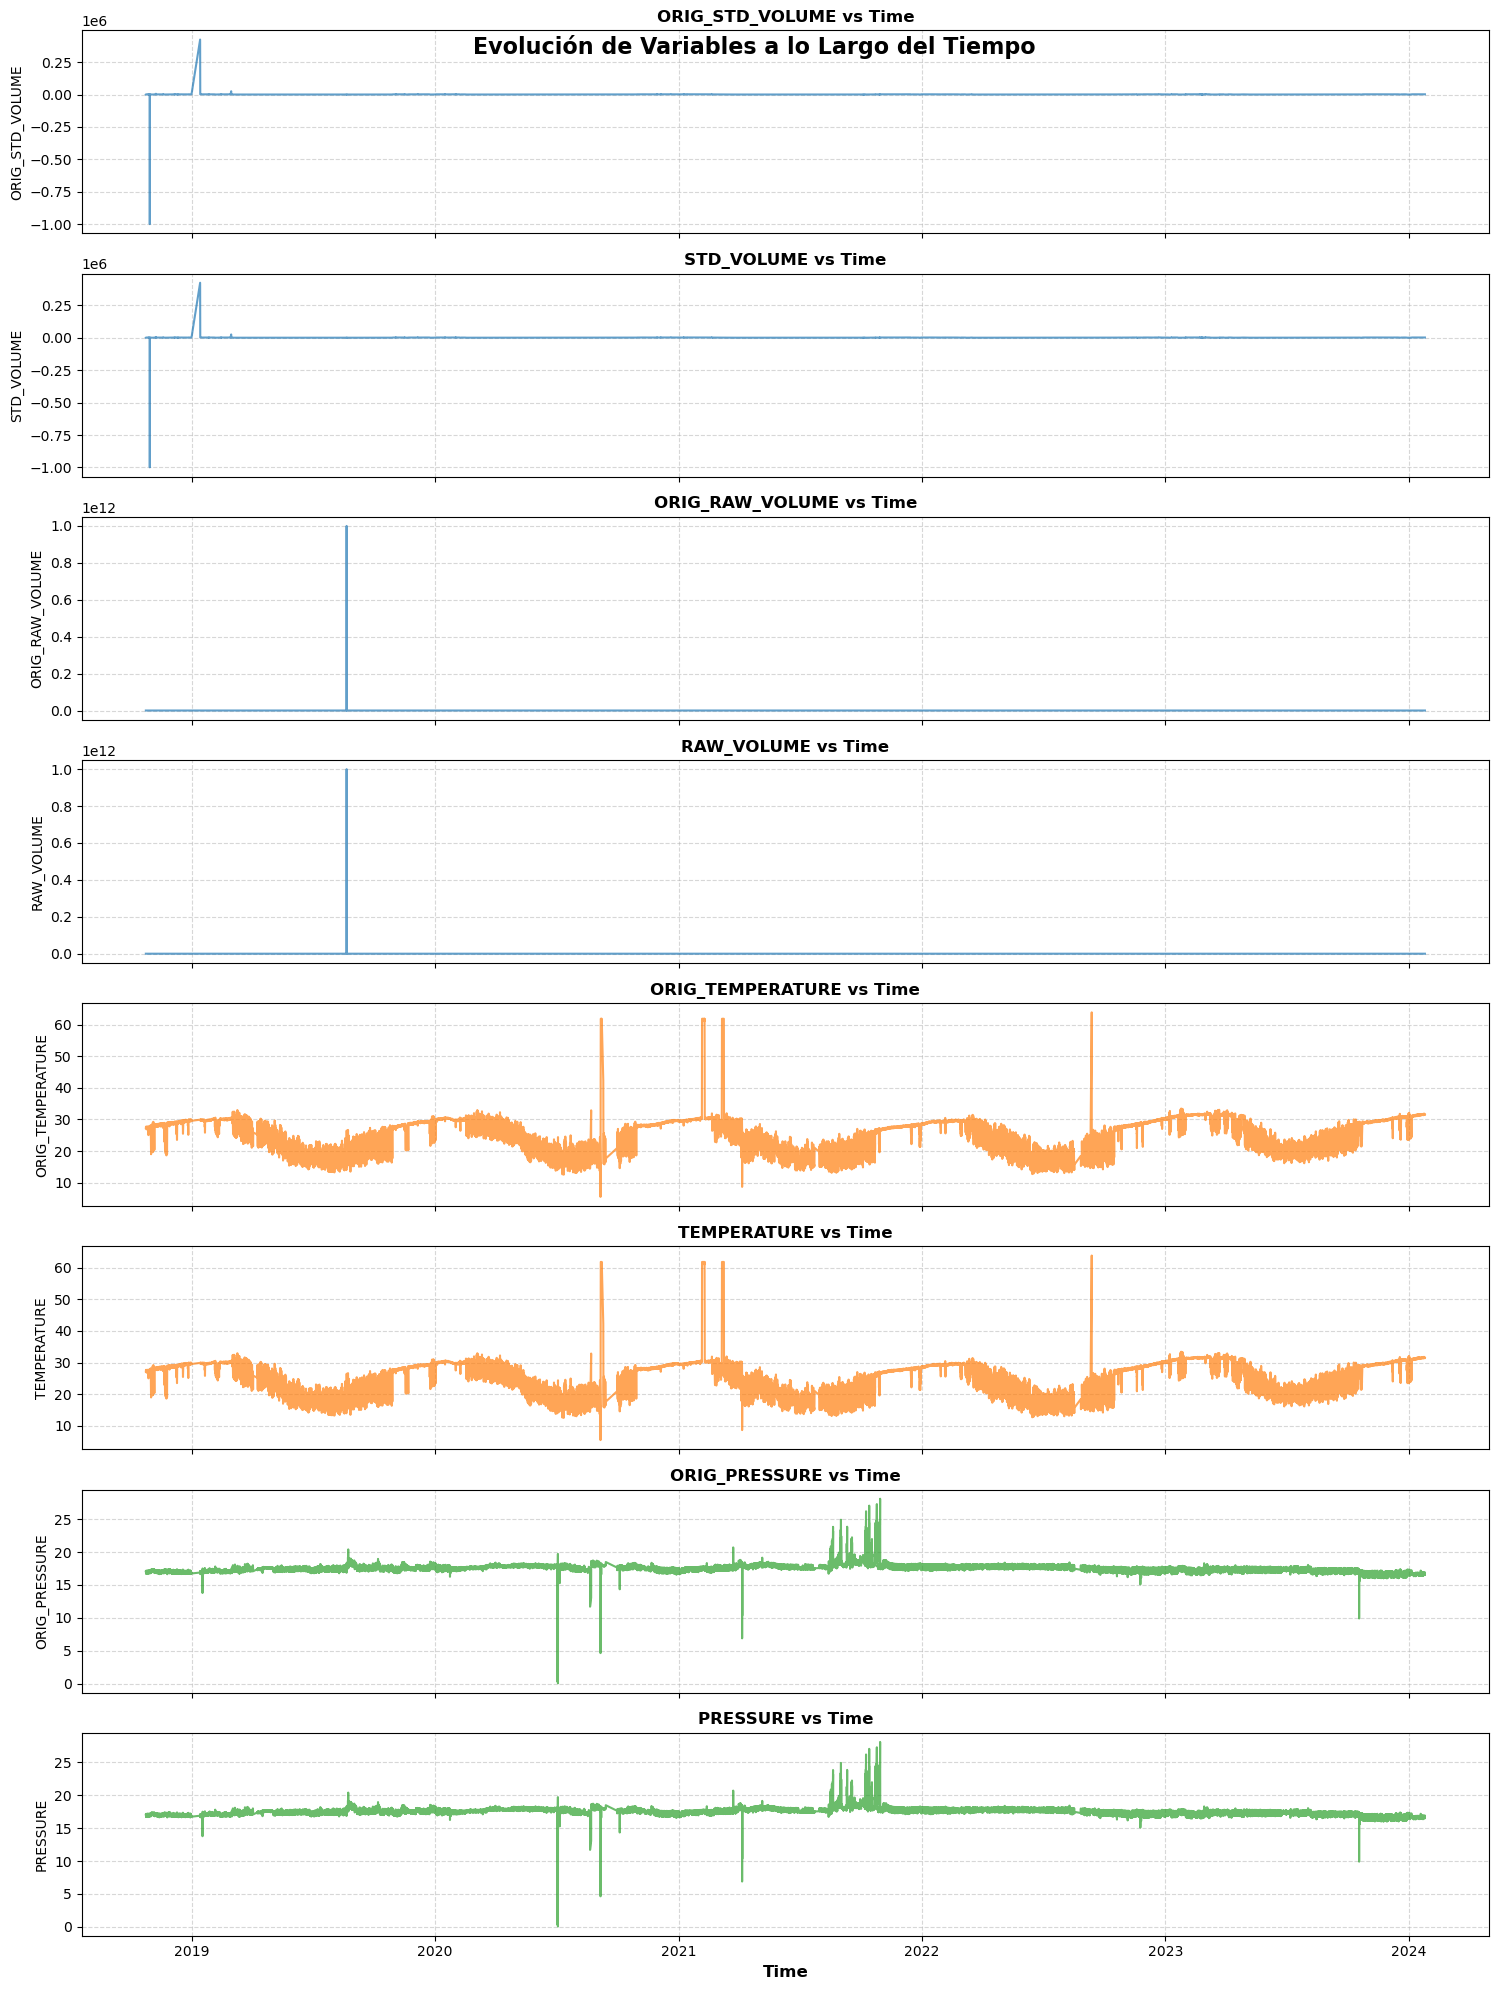

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convertir la columna EFFECTIVE_DATE a datetime si no lo está
#e1['EFFECTIVE_DATE'] = pd.to_datetime(e1['EFFECTIVE_DATE'])
e1['EFFECTIVE_DATE'] = pd.to_datetime(e1['EFFECTIVE_DATE'], format='mixed')

# Definir las variables por categorías
volumen_vars = ['ORIG_STD_VOLUME', 'STD_VOLUME', 'ORIG_RAW_VOLUME', 'RAW_VOLUME']
temperatura_vars = ['ORIG_TEMPERATURE', 'TEMPERATURE']
presion_vars = ['ORIG_PRESSURE', 'PRESSURE']

# Unificar todas las variables en una sola lista para iteración
variables = volumen_vars + temperatura_vars + presion_vars

# Definir colores para cada categoría
colores = {
    'Volumen': '#1f77b4',      # Azul
    'Temperatura': '#ff7f0e',  # Naranja
    'Presión': '#2ca02c'       # Verde
}

# Crear una figura con subgráficos
fig, axs = plt.subplots(len(variables), 1, figsize=(15, 20), sharex=True)

# Iterar sobre las variables y asignar color según su categoría
for i, var in enumerate(variables):
    if var in volumen_vars:
        color = colores['Volumen']
    elif var in temperatura_vars:
        color = colores['Temperatura']
    else:
        color = colores['Presión']
    
    sns.lineplot(data=e1, x='EFFECTIVE_DATE', y=var, ax=axs[i], color=color, alpha=0.7)
    
    axs[i].set_title(f'{var} vs Time', fontsize=12, fontweight='bold')
    axs[i].set_ylabel(var)
    axs[i].grid(True, linestyle='--', alpha=0.5)  # Agregar grid ligero para mejor legibilidad

# Ajustar el diseño y la etiqueta del eje X
axs[-1].set_xlabel('Time', fontsize=12, fontweight='bold')

# Espaciado óptimo entre subgráficos
plt.tight_layout()

# Título general de la figura
plt.suptitle("Evolución de Variables a lo Largo del Tiempo", fontsize=16, fontweight='bold')

plt.show()


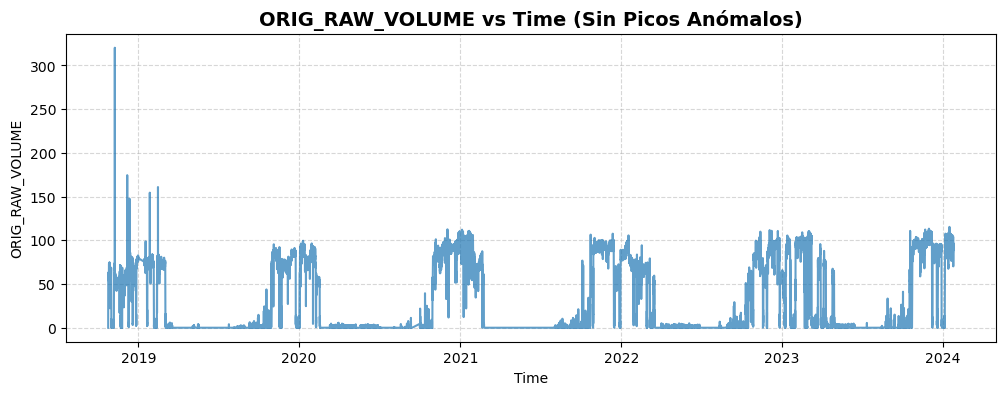

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Asumimos que ya tenemos los datos en un DataFrame llamado e1
# Primero, identificamos los dos valores más altos en ORIG_STD_VOLUME
top_values = e1['ORIG_RAW_VOLUME'].nlargest(4)

# Filtramos los datos eliminando estos dos picos
e1_filtered = e1[~e1['ORIG_RAW_VOLUME'].isin(top_values)]

# Crear la gráfica sin los picos
plt.figure(figsize=(12, 4))
plt.plot(e1_filtered['EFFECTIVE_DATE'], e1_filtered['ORIG_RAW_VOLUME'], color='#1f77b4', alpha=0.7)
plt.title("ORIG_RAW_VOLUME vs Time (Sin Picos Anómalos)", fontsize=14, fontweight='bold')
plt.xlabel("Time")
plt.ylabel("ORIG_RAW_VOLUME")
plt.grid(True, linestyle='--', alpha=0.5)

# Mostrar la gráfica
plt.show()


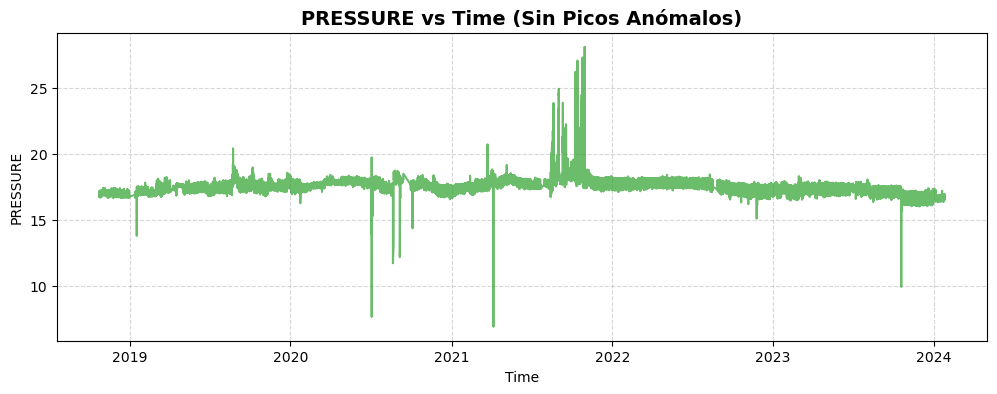

In [ ]:
# Identificar los dos valores más altos en PRESSURE
top_values_pressure = e1_filtered_filtered_filtered_filtered['PRESSURE'].nlargest(2)
smallest_values_pressure = e1['PRESSURE'].nsmallest(3)

# Filtrar los datos eliminando estos dos picos
#e1_filtered_pressure = e1[~e1['PRESSURE'].isin(top_values_pressure)]
e1_filtered_pressure = e1[~e1['PRESSURE'].isin(smallest_values_pressure)]

# Crear la gráfica sin los picos en presión
plt.figure(figsize=(12, 4))
plt.plot(e1_filtered_pressure['EFFECTIVE_DATE'], e1_filtered_pressure['PRESSURE'], color='#2ca02c', alpha=0.7)
plt.title("PRESSURE vs Time (Sin Picos Anómalos)", fontsize=14, fontweight='bold')
plt.xlabel("Time")
plt.ylabel("PRESSURE")
plt.grid(True, linestyle='--', alpha=0.5)

# Mostrar la gráfica
plt.show()


🔴 Todavía hay eventos de presión baja que podrían ser de interés.
🔴 Algunas caídas abruptas pueden indicar fallos en sensores o eventos operativos específicos.
🔴 En 2023-2024, se ve más inestabilidad en la presión, lo que podría reflejar cambios en las condiciones del sistema o problemas operativos recientes.

/Users/alejandrabenavidessanclemente/anaconda3/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1256: RuntimeWarning: invalid value encountered in scalar multiply
  loval = q1 - whis * stats['iqr']
/Users/alejandrabenavidessanclemente/anaconda3/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1257: RuntimeWarning: invalid value encountered in scalar multiply
  hival = q3 + whis * stats['iqr']
/Users/alejandrabenavidessanclemente/anaconda3/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1256: RuntimeWarning: invalid value encountered in scalar multiply
  loval = q1 - whis * stats['iqr']
/Users/alejandrabenavidessanclemente/anaconda3/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1257: RuntimeWarning: invalid value encountered in scalar multiply
  hival = q3 + whis * stats['iqr']
/Users/alejandrabenavidessanclemente/anaconda3/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1256: RuntimeWarning: invalid value encountered in scalar multiply


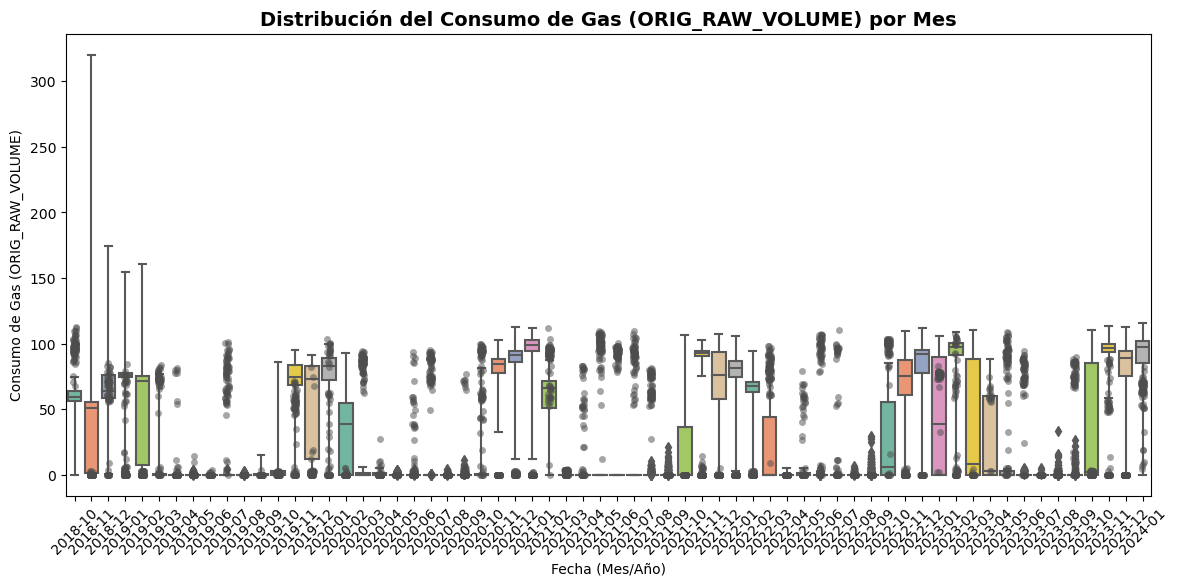

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Crear una copia del DataFrame procesado
processed_e1_df = e1_filtered.copy()

# Convertir la fecha a un formato de periodo mensual para mejor agrupación
processed_e1_df['YearMonth'] = processed_e1_df['EFFECTIVE_DATE'].dt.to_period("M")

# Configurar la figura
plt.figure(figsize=(14, 6))

# Crear el boxplot para el consumo de gas
ax = sns.boxplot(
    data=processed_e1_df,
    x='YearMonth',
    y='ORIG_RAW_VOLUME',  # También puedes probar con ORIG_STD_VOLUME
    palette='Set2',
    whis=np.inf  # Incluir todos los valores sin limitar los bigotes
)

# Añadir el stripplot para visualizar los valores individuales
ax = sns.stripplot(
    data=processed_e1_df.sample(frac=0.1, random_state=42),  # Muestrear para evitar sobrecarga
    x='YearMonth',
    y='ORIG_RAW_VOLUME',
    color='.3',
    alpha=0.5
)

# Configurar el título y etiquetas
plt.title('Distribución del Consumo de Gas (ORIG_RAW_VOLUME) por Mes', fontsize=14, fontweight='bold')
plt.xlabel('Fecha (Mes/Año)')
plt.ylabel('Consumo de Gas (ORIG_RAW_VOLUME)')

# Rotar etiquetas del eje X para mejorar visibilidad
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.show()


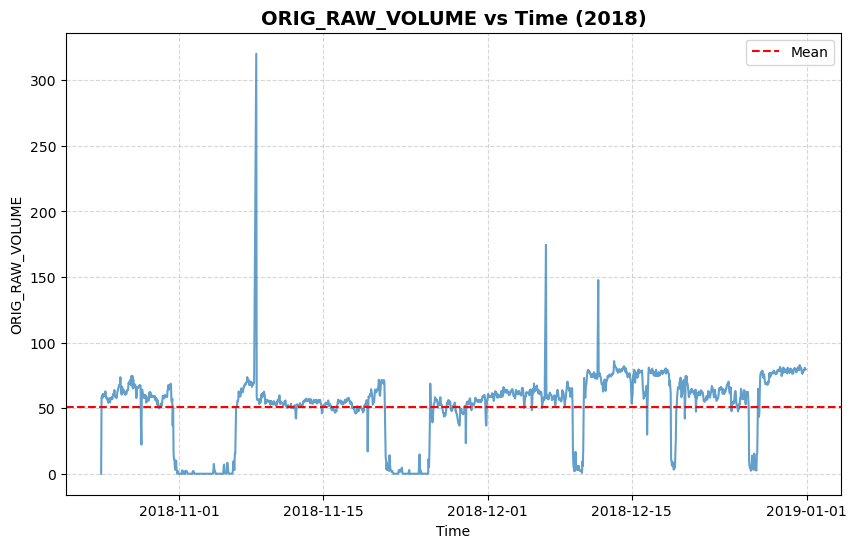

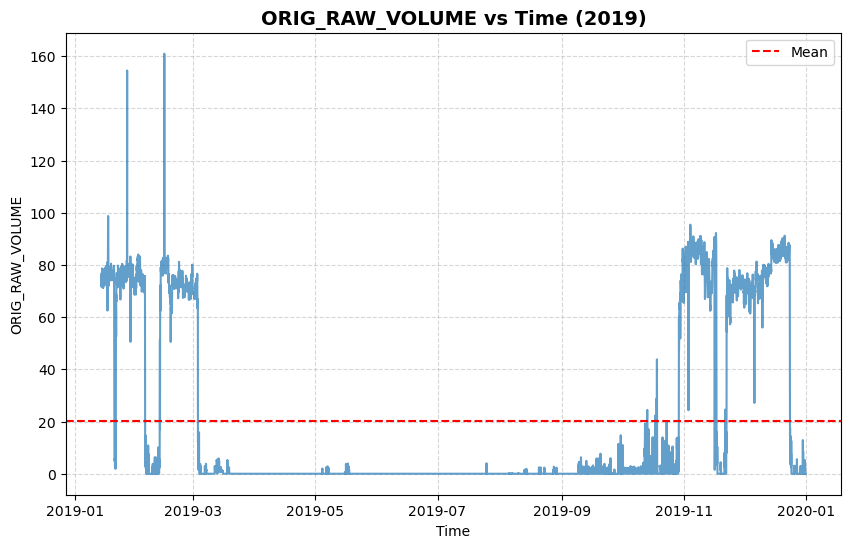

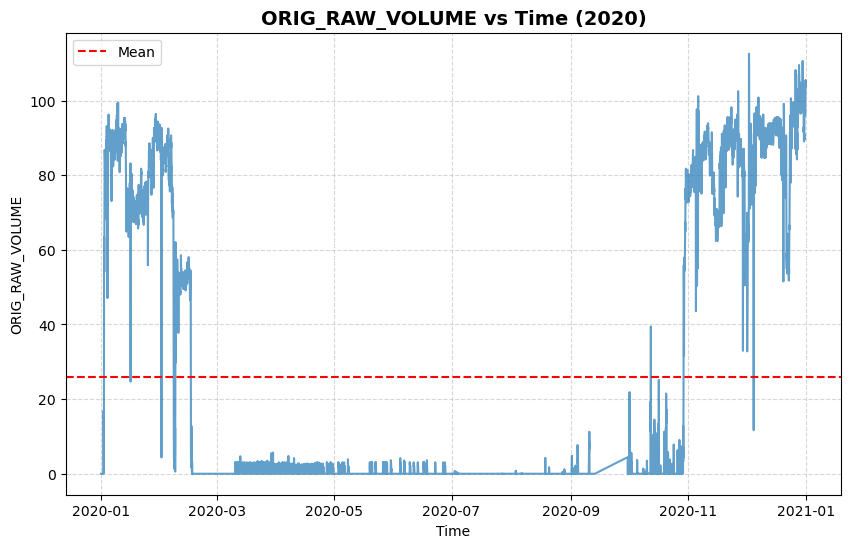

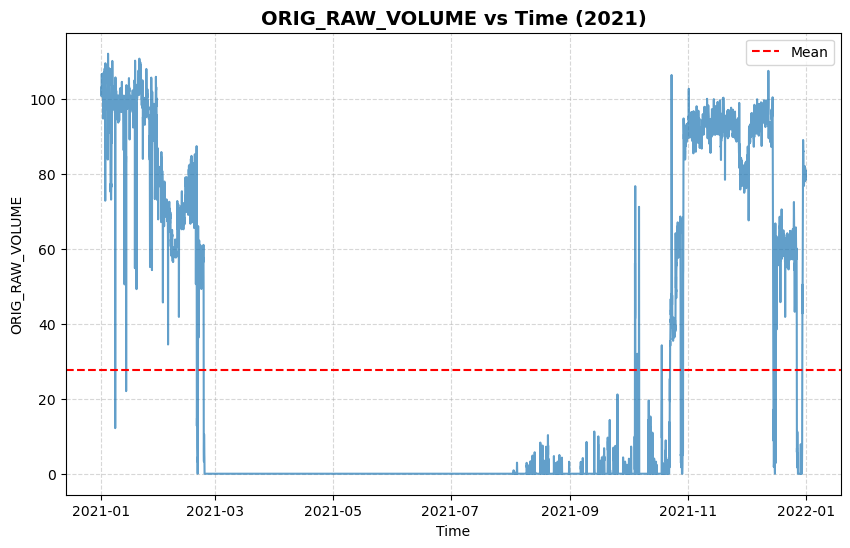

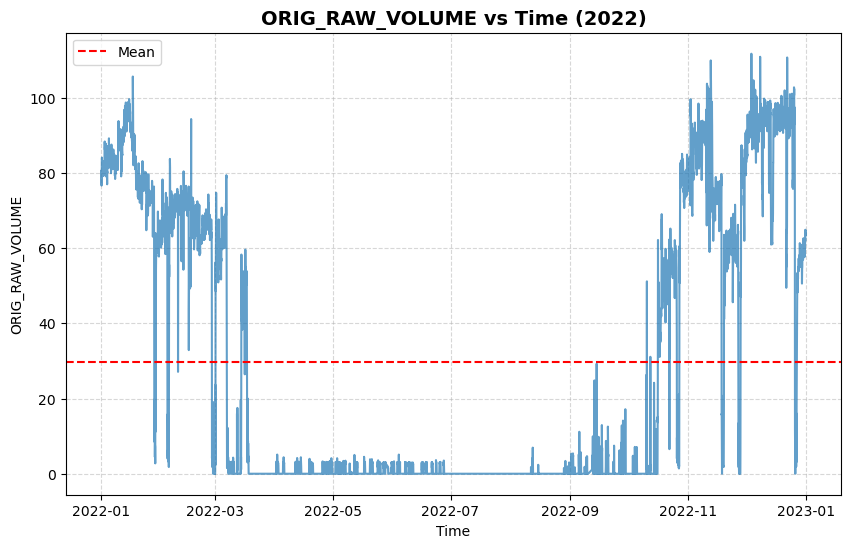

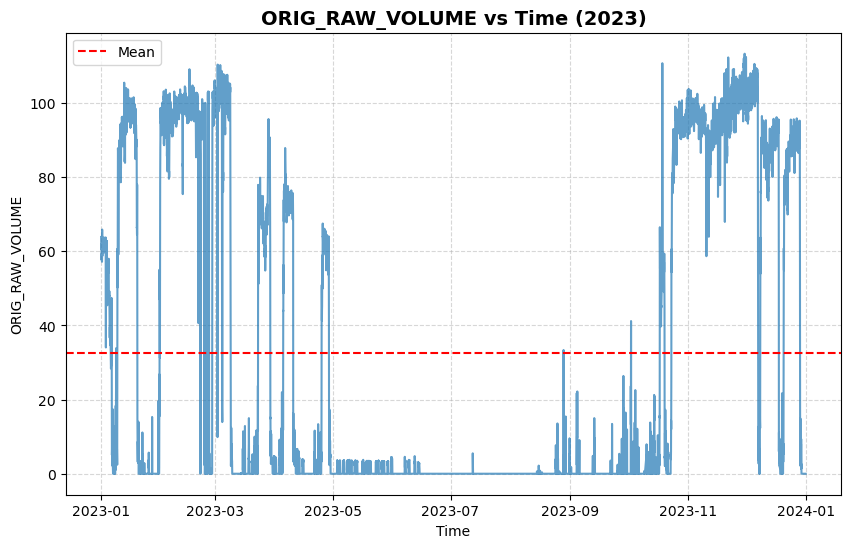

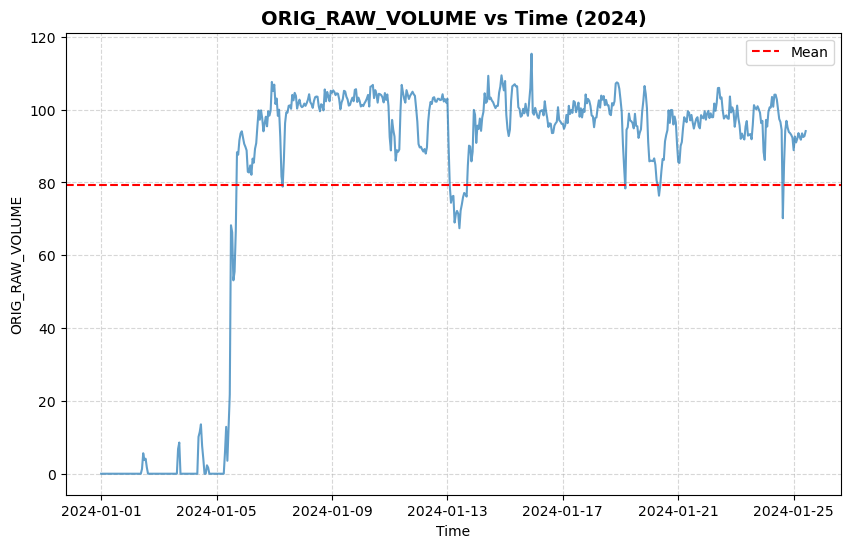

In [13]:
# Filtrar los datos por año y crear una gráfica para cada año
years = e1_filtered['EFFECTIVE_DATE'].dt.year.unique()
volumen_vars = ['ORIG_RAW_VOLUME']

for year in years:
    yearly_data = e1_filtered[e1_filtered['EFFECTIVE_DATE'].dt.year == year]
    
    for var in volumen_vars:
        plt.figure(figsize=(10, 6))
        sns.lineplot(data=yearly_data, x='EFFECTIVE_DATE', y=var, color=colores['Volumen'], alpha=0.7)
        
        plt.title(f'{var} vs Time ({year})', fontsize=14, fontweight='bold')
        plt.xlabel('Time')
        plt.ylabel(var)
        plt.grid(True, linestyle='--', alpha=0.5)
        
        # Principios de Gestalt: Proximidad y Similitud
        plt.axhline(y=yearly_data[var].mean(), color='red', linestyle='--', label='Mean')
        plt.legend()
        
        plt.show()

In [25]:
# Filtrar los datos eliminando los registros donde ORIG_RAW_VOLUME sea mayor a 100
e1_filtered = e1_filtered[e1_filtered['ORIG_RAW_VOLUME'] <= 140]

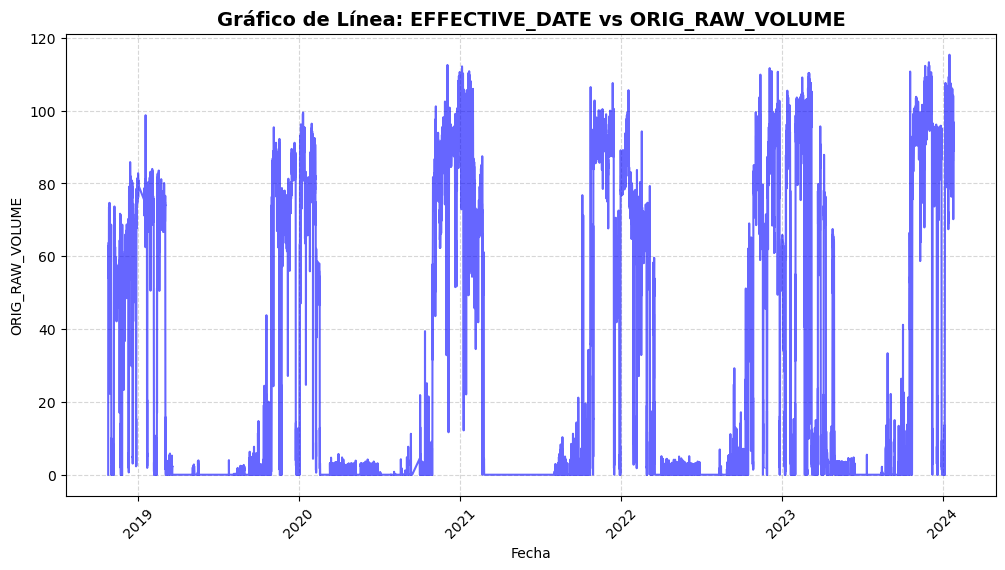

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
# Definir las fechas de inicio y fin para el filtro
start_date = '2018-01-01'
end_date = '2024-01-30'
# Filtrar los datos según las fechas definidas
filtered_data = e1_filtered[(e1_filtered['EFFECTIVE_DATE'] >= start_date) & (e1_filtered['EFFECTIVE_DATE'] <= end_date)]
# Crear el gráfico de línea
plt.figure(figsize=(12, 6))
plt.plot(filtered_data['EFFECTIVE_DATE'], filtered_data['ORIG_RAW_VOLUME'], color='blue', alpha=0.6)
plt.title('Gráfico de Línea: EFFECTIVE_DATE vs ORIG_RAW_VOLUME', fontsize=14, fontweight='bold')
plt.xlabel('Fecha')
plt.ylabel('ORIG_RAW_VOLUME')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)  # Rotar etiquetas del eje X para mejor visibilidad
# Mostrar el gráfico
plt.show()

## Conclusiones



**Pasarle el mix para que en un solo código se haga un for donde haga todo lo del siguiente codigo en uno

In [154]:
# Convertir la columna EFFECTIVE_DATE a datetime si no lo está
e1['EFFECTIVE_DATE'] = pd.to_datetime(e1['EFFECTIVE_DATE'])

# Filtrar los datos para el año 2022
filtered_data_2022 = e1[e1['EFFECTIVE_DATE'].dt.year == 2022]



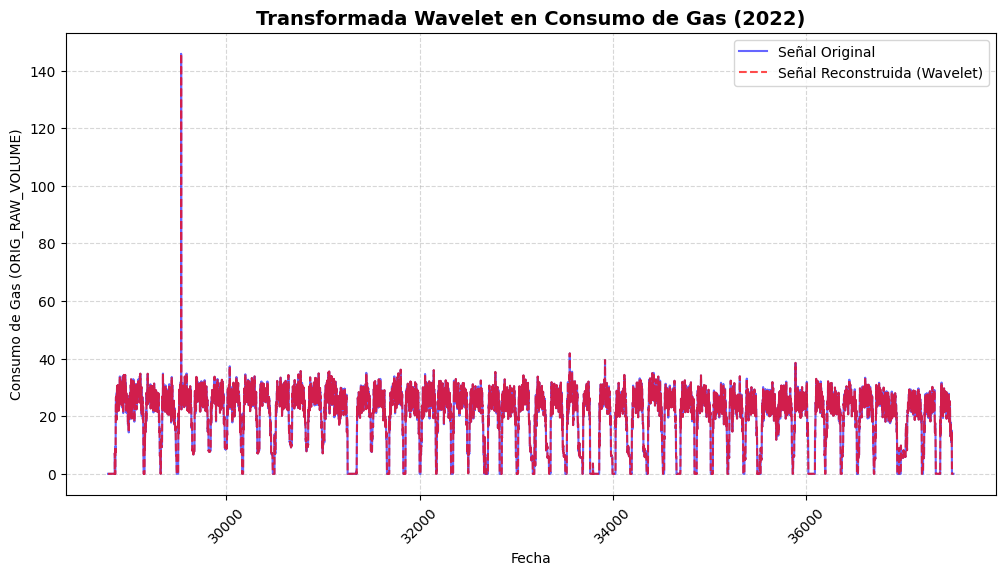

In [155]:
import pywt
import numpy as np

# Extraer los valores de ORIG_RAW_VOLUME para el año 2022
signal = filtered_data_2022['ORIG_RAW_VOLUME'].dropna().values

# Aplicar la Transformada Wavelet Discreta (DWT) usando la wavelet 'db4'
coeffs = pywt.wavedec(signal, wavelet='db4', level=5)

# Reconstrucción de la señal a partir de los coeficientes
reconstructed_signal = pywt.waverec(coeffs, wavelet='db4')

# Ajustar la longitud de la señal reconstruida para coincidir con la original
reconstructed_signal = reconstructed_signal[:len(signal)]

# Graficar la señal original y la reconstruida
plt.figure(figsize=(12,6))
plt.plot(filtered_data_2022.index[:len(signal)], signal, label='Señal Original', color='blue', alpha=0.6)
plt.plot(filtered_data_2022.index[:len(signal)], reconstructed_signal, label='Señal Reconstruida (Wavelet)', color='red', linestyle='dashed', alpha=0.7)
plt.xlabel('Fecha')
plt.ylabel('Consumo de Gas (ORIG_RAW_VOLUME)')
plt.title('Transformada Wavelet en Consumo de Gas (2022)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)  # Rotar etiquetas del eje X para mejor visibilidad
plt.show()


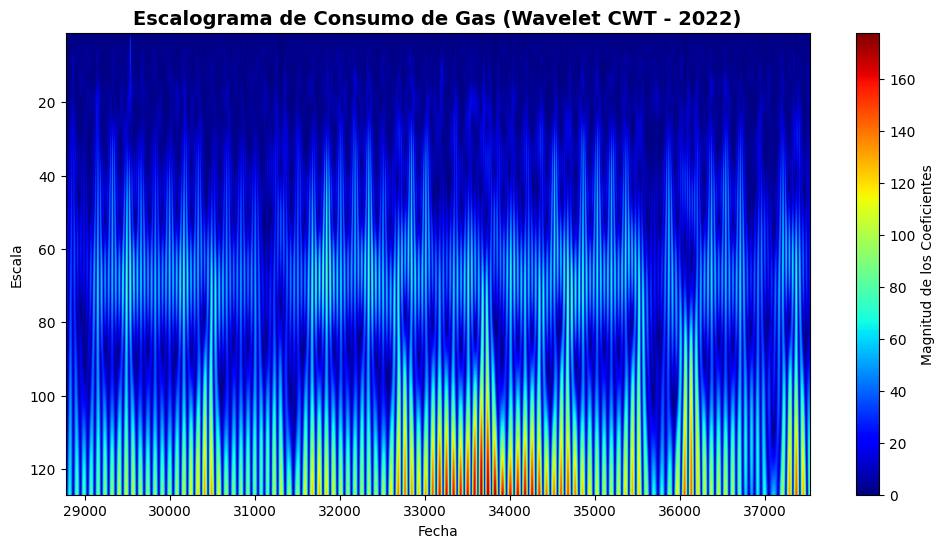

In [156]:
# Aplicar la Transformada Wavelet Continua (CWT)
scales = np.arange(1, 128)  # Definir escalas para la transformada
coefficients, frequencies = pywt.cwt(signal, scales, 'morl')  # Usar la wavelet Morlet

# Graficar el escalograma correctamente con imshow
plt.figure(figsize=(12, 6))
plt.imshow(np.abs(coefficients), aspect='auto', cmap='jet', extent=[filtered_data_2022.index.min(), filtered_data_2022.index.max(), scales[-1], scales[0]])
plt.colorbar(label="Magnitud de los Coeficientes")
plt.xlabel("Fecha")
plt.ylabel("Escala")
plt.title("Escalograma de Consumo de Gas (Wavelet CWT - 2022)", fontsize=14, fontweight="bold")
plt.show()


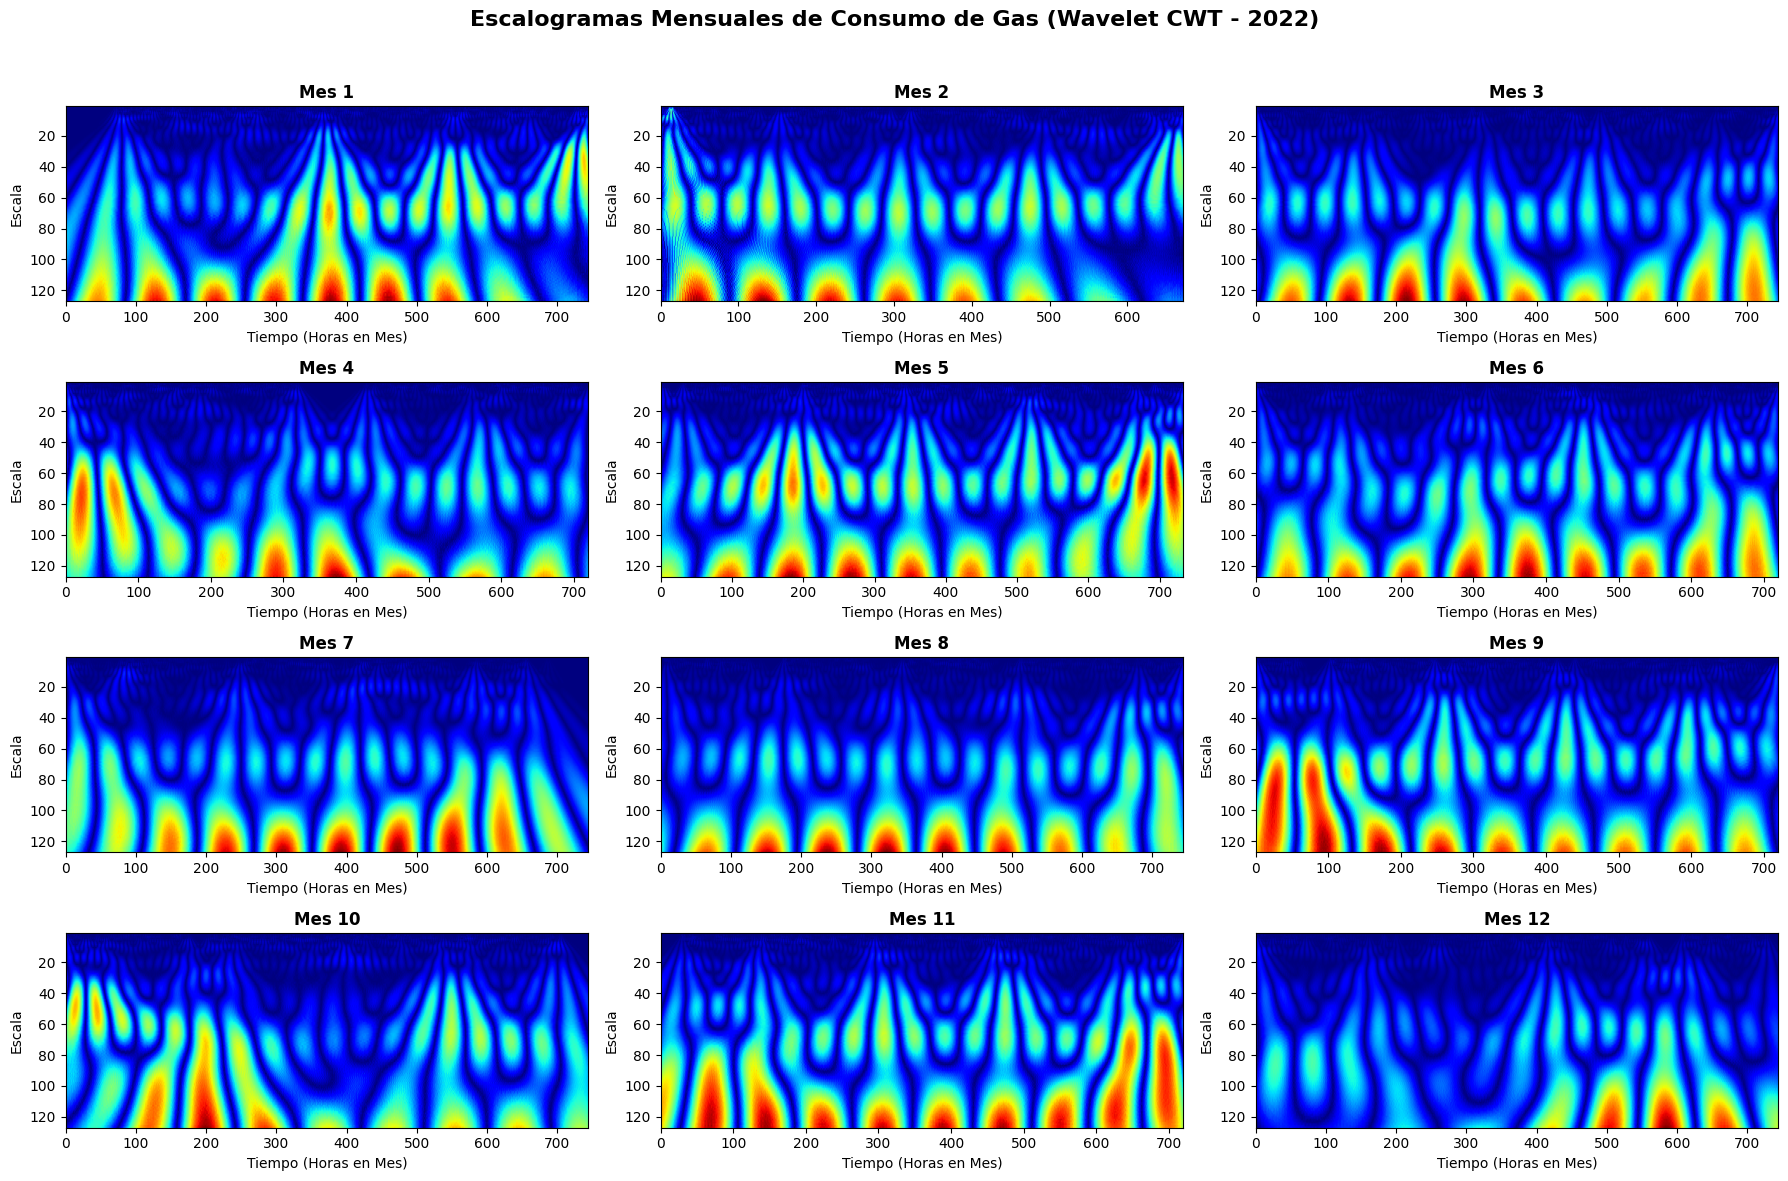

In [157]:
# Crear una figura con subgráficos para cada mes del 2022
fig, axes = plt.subplots(4, 3, figsize=(18, 12))  # 4 filas, 3 columnas para los 12 meses
fig.suptitle("Escalogramas Mensuales de Consumo de Gas (Wavelet CWT - 2022)", fontsize=16, fontweight="bold")

# Iterar sobre cada mes del 2022
for i, month in enumerate(range(1, 13)):
    # Filtrar los datos para el mes actual
    df_month = filtered_data_2022[filtered_data_2022['EFFECTIVE_DATE'].dt.month == month]
    signal_month = df_month['ORIG_RAW_VOLUME'].values
    
    # Aplicar la Transformada Wavelet Continua (CWT) con wavelet Morlet
    coefficients, frequencies = pywt.cwt(signal_month, scales, 'morl')
    
    # Seleccionar el eje para la gráfica actual
    ax = axes[i // 3, i % 3]  # Posición en la cuadrícula
    
    # Graficar el escalograma para el mes actual
    ax.imshow(np.abs(coefficients), aspect='auto', cmap='jet',
              extent=[0, len(signal_month), scales[-1], scales[0]])
    
    # Configurar etiquetas y título
    ax.set_title(f"Mes {month}", fontsize=12, fontweight="bold")
    ax.set_xlabel("Tiempo (Horas en Mes)")
    ax.set_ylabel("Escala")

# Ajustar espaciado
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


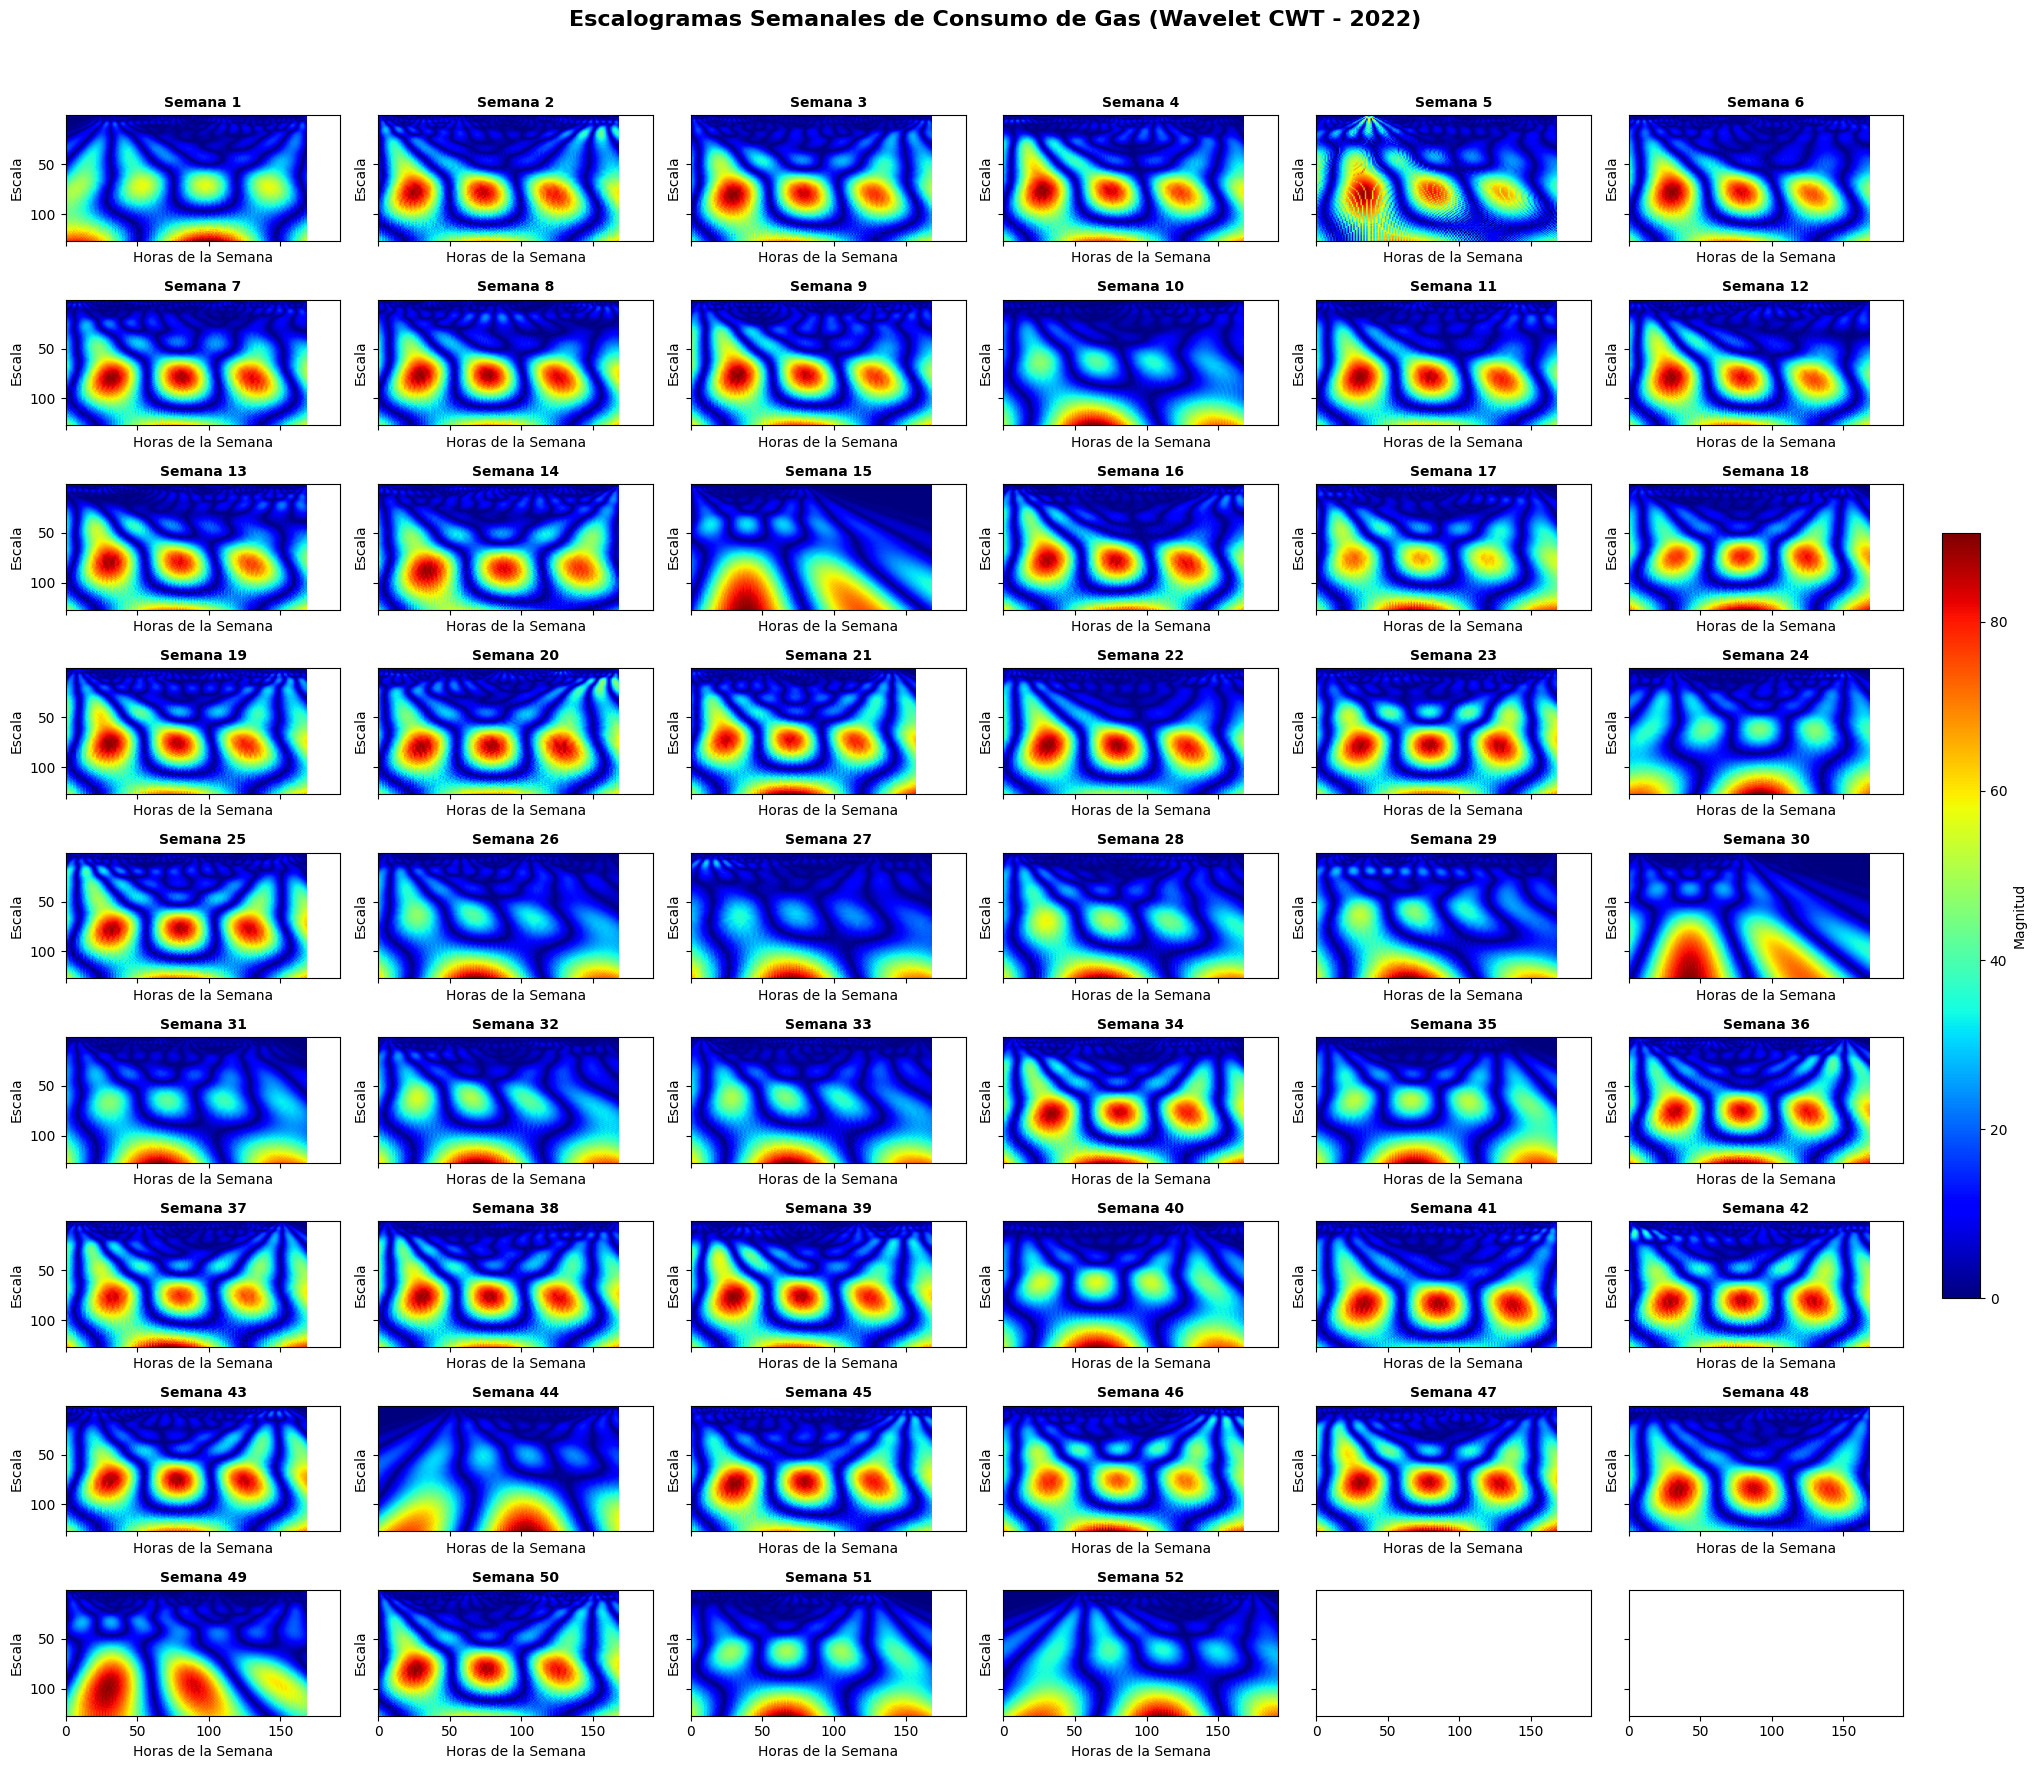

In [160]:
import pandas as pd
import numpy as np
import pywt
import matplotlib.pyplot as plt
import math

# Cargar los datos desde Excel
e1 = pd.read_excel(r"C:/Users/diana/OneDrive - Universidad de los Andes/Documentos/9no Semestre/TesisGEB_AlejaYCami/Repositorio/ProyectoGradoGEB/datos/EICH101.xlsx")

# Convertir la columna EFFECTIVE_DATE a datetime y establecerla como índice
e1['EFFECTIVE_DATE'] = pd.to_datetime(e1['EFFECTIVE_DATE'])
e1.set_index('EFFECTIVE_DATE', inplace=True)

# Filtrar los datos para el año 2022
df_2022 = e1[e1.index.year == 2022].copy()

# Obtener la lista de semanas únicas en orden correcto
weeks = sorted(df_2022.index.to_series().dt.isocalendar().week.unique())

# Asegurar que la semana 52 se ordena correctamente
weeks = [w for w in weeks if w != 52] + [52] if 52 in weeks else weeks

num_weeks = len(weeks)

# Definir el número de columnas y calcular filas dinámicamente
num_cols = 6  # Número fijo de columnas para que sea legible
num_rows = math.ceil(num_weeks / num_cols)  # Número de filas según las semanas

# Crear la figura con subgráficos
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 2), sharex=True, sharey=True)
fig.suptitle("Escalogramas Semanales de Consumo de Gas (Wavelet CWT - 2022)", fontsize=16, fontweight="bold")

# Escalas para el wavelet
scales = np.arange(1, 128)

# Iterar sobre cada semana y graficar el escalograma
for i, week in enumerate(weeks):
    df_week = df_2022[df_2022.index.to_series().dt.isocalendar().week == week]
    signal_week = df_week["ORIG_RAW_VOLUME"].values

    if len(signal_week) > 0:  # Evitar errores con semanas vacías
        coefficients, frequencies = pywt.cwt(signal_week, scales, "morl")

        # Determinar la posición en la cuadrícula
        row, col = divmod(i, num_cols)
        ax = axes[row, col] if num_rows > 1 else axes[col]

        # Graficar el escalograma
        img = ax.imshow(np.abs(coefficients), aspect="auto", cmap="jet",
                        extent=[0, len(signal_week), scales[-1], scales[0]])
        ax.set_title(f"Semana {week}", fontsize=10, fontweight="bold")
        ax.set_xlabel("Horas de la Semana")
        ax.set_ylabel("Escala")

# Ajustar espaciado
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Agregar barra de color
cbar = fig.colorbar(img, ax=axes.ravel().tolist(), orientation="vertical", fraction=0.02, pad=0.02)
cbar.set_label("Magnitud")

# Mostrar la figura
plt.show()
